In [1]:
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import spacy
from ast import literal_eval
import nltk
nltk.download('punkt')
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amritha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Amritha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from transformers import AutoTokenizer
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score, confusion_matrix, log_loss

In [5]:
jobs=pd.read_csv('fake_job_postings.csv')
jobs.head()

job_id                                              title  \
0       1                            ['Marketing', 'Intern']   
1       2  ['Customer', 'Service', '-', 'Cloud', 'Video',...   
2       3  ['Commissioning', 'Machinery', 'Assistant', '(...   
3       4  ['Account', 'Executive', '-', 'Washington', 'DC']   
4       5                      ['Bill', 'Review', 'Manager']   

                                  location     department salary_range  \
0    ['US', ',', 'NY', ',', 'New', 'York']  ['Marketing']      ['nan']   
1             ['NZ', ',', ',', 'Auckland']    ['Success']      ['nan']   
2          ['US', ',', 'IA', ',', 'Wever']        ['nan']      ['nan']   
3     ['US', ',', 'DC', ',', 'Washington']      ['Sales']      ['nan']   
4  ['US', ',', 'FL', ',', 'Fort', 'Worth']        ['nan']      ['nan']   

                                     company_profile  \
0  ['We', "'re", 'Food52', ',', 'and', 'we', "'ve...   
1  ['90', 'Seconds', ',', 'the', 'worlds', 'Cloud...   
2  ['Valor', 'Services', 'provides', 'Workforce',...   
3  ['Our', 'passion', 'for', 'improving', 'qualit...   
4  ['SpotSource', 'Solutions', 'LLC', 'is', 'a', ...   

                                         description  \
0  ['Food52', ',', 'a', 'fast-growing', ',', 'Jam...   
1  ['Organised', '-', 'Focused', '-', 'Vibrant', ...   
2  ['Our', 'client', ',', 'located', 'in', 'Houst...   
3  ['THE', 'COMPANY', ':', 'ESRI', '–', 'Environm...   
4  ['JOB', 'TITLE', ':', 'Itemization', 'Review',...   

                                        requirements  \
0  ['Experience', 'with', 'content', 'management'...   
1  ['What', 'we', 'expect', 'from', 'you', ':', '...   
2  ['Implement', 'pre-commissioning', 'and', 'com...   
3  ['EDUCATION', ':', 'Bachelor', '’', 's', 'or',...   
4  ['QUALIFICATIONS', ':', 'RN', 'license', 'in',...   

                                            benefits  telecommuting  \
0                                            ['nan']              0   
1  ['What', 'you', 'will', 'get', 'from', 'usThro...              0   
2                                            ['nan']              0   
3  ['Our', 'culture', 'is', 'anything', 'but', 'c...              0   
4                    ['Full', 'Benefits', 'Offered']              0   

   has_company_logo  has_questions employment_type      required_experience  \
0                 1              0       ['Other']           ['Internship']   
1                 1              0   ['Full-time']    ['Not', 'Applicable']   
2                 1              0         ['nan']                  ['nan']   
3                 1              0   ['Full-time']  ['Mid-Senior', 'level']   
4                 1              1   ['Full-time']  ['Mid-Senior', 'level']   

             required_education                             industry  \
0                       ['nan']                              ['nan']   
1                       ['nan']  ['Marketing', 'and', 'Advertising']   
2                       ['nan']                              ['nan']   
3  ['Bachelor', "'s", 'Degree']             ['Computer', 'Software']   
4  ['Bachelor', "'s", 'Degree']  ['Hospital', '&', 'Health', 'Care']   

                         function  fraudulent  
0                   ['Marketing']           0  
1         ['Customer', 'Service']           0  
2                         ['nan']           0  
3                       ['Sales']           0  
4  ['Health', 'Care', 'Provider']           0

In [6]:
jobs['salary_range'].value_counts()

salary_range
['nan']              15012
['0-0']                142
['40000-50000']         66
['30000-40000']         55
['45000-67000']         37
                     ...  
['15-25']                1
['60-75']                1
['300000-325000']        1
['20-22']                1
['3700-3800']            1
Name: count, Length: 875, dtype: int64

In [7]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func

In [8]:
jobs.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [9]:
jobs.shape

(17880, 18)

In [10]:
jobs.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [11]:
jobs.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

## Data Cleaning

In [13]:
text_columns = ["title", "location", "department", "salary_range", 
                "company_profile", "description", "requirements", "benefits",
                "employment_type", "required_experience", "required_education", 
                "industry", "function"]

In [14]:
# Clean the text data

# Removes unnecessary characters (square brackets, single quotes) and leading/trailing spaces from the text in specified columns to ensure consistency.
# Replaces placeholder values (like the string "nan") with actual np.nan (missing value) to improve data quality and facilitate accurate analysis in subsequent steps.

def clean_text(text):
    if isinstance(text, str):
        text = text.replace("[", "").replace("]", "").replace("'", "").strip()
        return text
    return text



for column in text_columns:
    if column in jobs.columns:
        jobs[column] = jobs[column].apply(clean_text)

# Replace placeholders ("nan") with np.nan
jobs.replace("nan", np.nan, inplace=True)


In [15]:
jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [16]:
# Handle columns based on missing value analysis
# Since the "department" and "salary_range" columns has more missing vales than actual, it can lead to misleading insights 
columns_to_drop = ["department", "salary_range"]  # High missing percentages, non-critical
jobs = jobs.drop(columns=columns_to_drop)

# Impute missing values for categorical columns
categorical_cols = ["location", "company_profile", "description", "requirements", "benefits", 
                    "employment_type", "required_experience", "required_education", 
                    "industry", "function"]

for col in categorical_cols:
    jobs[col].fillna("Unknown", inplace=True)



C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3126458503.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jobs[col].fillna("Unknown", inplace=True)


In [17]:
cols_irrelevant = ["benefits", "job_id", "location"]  # non-critical
jobs = jobs.drop(columns=cols_irrelevant)

In [18]:
textual_columns = ['company_profile','description', 'requirements']

In [19]:
jobs.head()

title  \
0                               Marketing, Intern   
1  Customer, Service, -, Cloud, Video, Production   
2  Commissioning, Machinery, Assistant, (, CMA, )   
3           Account, Executive, -, Washington, DC   
4                           Bill, Review, Manager   

                                     company_profile  \
0  We, "re", Food52, ,, and, we, "ve", created, a...   
1  90, Seconds, ,, the, worlds, Cloud, Video, Pro...   
2  Valor, Services, provides, Workforce, Solution...   
3  Our, passion, for, improving, quality, of, lif...   
4  SpotSource, Solutions, LLC, is, a, Global, Hum...   

                                         description  \
0  Food52, ,, a, fast-growing, ,, James, Beard, A...   
1  Organised, -, Focused, -, Vibrant, -, Awesome,...   
2  Our, client, ,, located, in, Houston, ,, is, a...   
3  THE, COMPANY, :, ESRI, –, Environmental, Syste...   
4  JOB, TITLE, :, Itemization, Review, ManagerLOC...   

                                        requirements  telecommuting  \
0  Experience, with, content, management, systems...              0   
1  What, we, expect, from, you, :, Your, key, res...              0   
2  Implement, pre-commissioning, and, commissioni...              0   
3  EDUCATION, :, Bachelor, ’, s, or, Master, ’, s...              0   
4  QUALIFICATIONS, :, RN, license, in, the, State...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time     Not, Applicable   
2                 1              0         Unknown             Unknown   
3                 1              0       Full-time   Mid-Senior, level   
4                 1              1       Full-time   Mid-Senior, level   

      required_education                     industry                function  \
0                Unknown                      Unknown               Marketing   
1                Unknown  Marketing, and, Advertising       Customer, Service   
2                Unknown                      Unknown                 Unknown   
3  Bachelor, "s", Degree           Computer, Software                   Sales   
4  Bachelor, "s", Degree    Hospital, &, Health, Care  Health, Care, Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

## Preprocessing

The goal of this code is to clean and preprocess the text data in the company_profile, description, and requirements columns of the jobs DataFrame by performing the following tasks:

Removing unnecessary words (like stopwords and punctuation)


Standardizing the text (lowercase, lemmatization)
Removing irrelevant data (like special characters, numbers, and extra spaces) This ensures that the text data is ready for further analysis, such as feature extraction, classification, or clustering.

In [22]:
jobs = pd.read_csv('processed_jobs.csv')

## EDA

In [24]:
jobs

title  \
0                                      Marketing, Intern   
1         Customer, Service, -, Cloud, Video, Production   
2         Commissioning, Machinery, Assistant, (, CMA, )   
3                  Account, Executive, -, Washington, DC   
4                                  Bill, Review, Manager   
...                                                  ...   
17875                 Account, Director, -, Distribution   
17876                                Payroll, Accountant   
17877  Project, Cost, Control, Staff, Engineer, -, Co...   
17878                                  Graphic, Designer   
17879                       Web, Application, Developers   

                                         company_profile  \
0      we , " re " , food52 , , , and , we , " ve " ,...   
1      , second , , , the , world , cloud , video , p...   
2      valor , service , provide , workforce , soluti...   
3      our , passion , for , improve , quality , of ,...   
4      spotsource , solution , llc , be , a , global ...   
...                                                  ...   
17875  vend , be , look , for , some , awesome , new ...   
17876  weblinc , be , the , e - commerce , platform ,...   
17877  we , provide , full , time , permanent , posit...   
17878                                            unknown   
17879  vend , be , look , for , some , awesome , new ...   

                                             description  \
0      food52 , , , a , fast - grow , , , james , bea...   
1      organise , - , focused , - , vibrant , - , awe...   
2      our , client , , , locate , in , houston , , ,...   
3      the , company , : , esri , – , environmental ,...   
4      job , title , : , itemization , review , manag...   
...                                                  ...   
17875  just , in , case , this , be , the , first , t...   
17876  the , payroll , accountant , will , focus , pr...   
17877  experienced , project , cost , control , staff...   
17878  nemsia , studio , be , look , for , an , exper...   
17879  who , be , we , ? , vend , be , an , award , w...   

                                            requirements  telecommuting  \
0      experience , with , content , management , sys...              0   
1      what , we , expect , from , you , : , your , k...              0   
2      implement , pre - commissioning , and , commis...              0   
3      education , : , bachelor , ' , s , or , master...              0   
4      qualification , : , rn , license , in , the , ...              0   
...                                                  ...            ...   
17875  to , ace , this , role , you , : , will , eat ...              0   
17876  - , b.a , . , or , b.s , . , in , accounting- ...              0   
17877  at , least , , year , professional , experienc...              0   
17878  , . , must , be , fluent , in , the , late , v...              0   
17879  we , want , to , hear , from , you , if , : , ...              0   

       has_company_logo  has_questions employment_type required_experience  \
0                     1              0           Other          Internship   
1                     1              0       Full-time     Not, Applicable   
2                     1              0         Unknown             Unknown   
3                     1              0       Full-time   Mid-Senior, level   
4                     1              1       Full-time   Mid-Senior, level   
...                 ...            ...             ...                 ...   
17875                 1              1       Full-time   Mid-Senior, level   
17876                 1              1       Full-time   Mid-Senior, level   
17877                 0              0       Full-time             Unknown   
17878                 0              1        Contract     Not, Applicable   
17879                 1              1       Full-time   Mid-Senior, level   

          required_education                     i

In [25]:
jobs.dtypes

title                  object
company_profile        object
description            object
requirements           object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

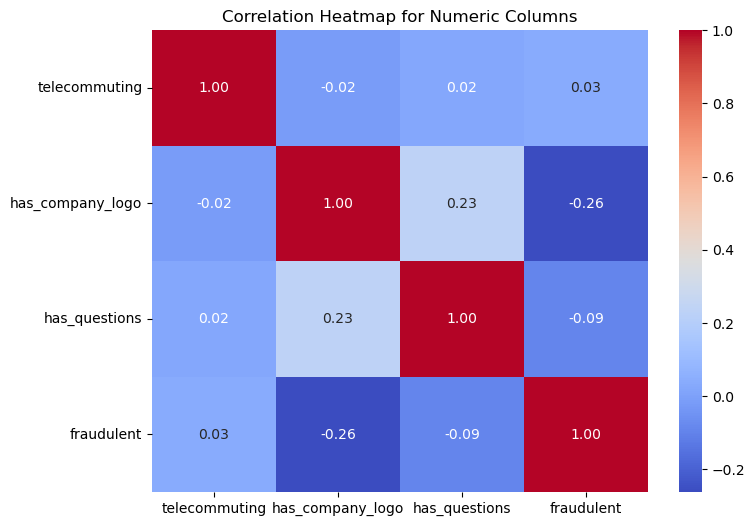

In [26]:
# Select numeric columns only
numeric_cols = jobs.select_dtypes(include=['int64'])

# Generate the correlation heatmap
if numeric_cols.empty:
    print("No numeric columns found in the dataset for correlation analysis.")
else:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap for Numeric Columns')
    plt.show()


In [27]:
numeric_cols.corr()

telecommuting  has_company_logo  has_questions  fraudulent
telecommuting          1.000000         -0.019836       0.020345    0.034523
has_company_logo      -0.019836          1.000000       0.233932   -0.261971
has_questions          0.020345          0.233932       1.000000   -0.091627
fraudulent             0.034523         -0.261971      -0.091627    1.000000

The correlations between these variables are generally weak, indicating that these factors (telecommuting, company logo, questions, and fraudulent classification) do not have strong linear relationships with one another in the dataset.
There is a moderate positive correlation between has_company_logo and has_questions, and a moderate negative correlation between has_company_logo and fraudulent.
None of the variables are highly correlated, meaning they might each contribute independently to classification of fraudulent jobs.

# Visualizations

##### 1) Distribution of Job Titles

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\4159195186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")


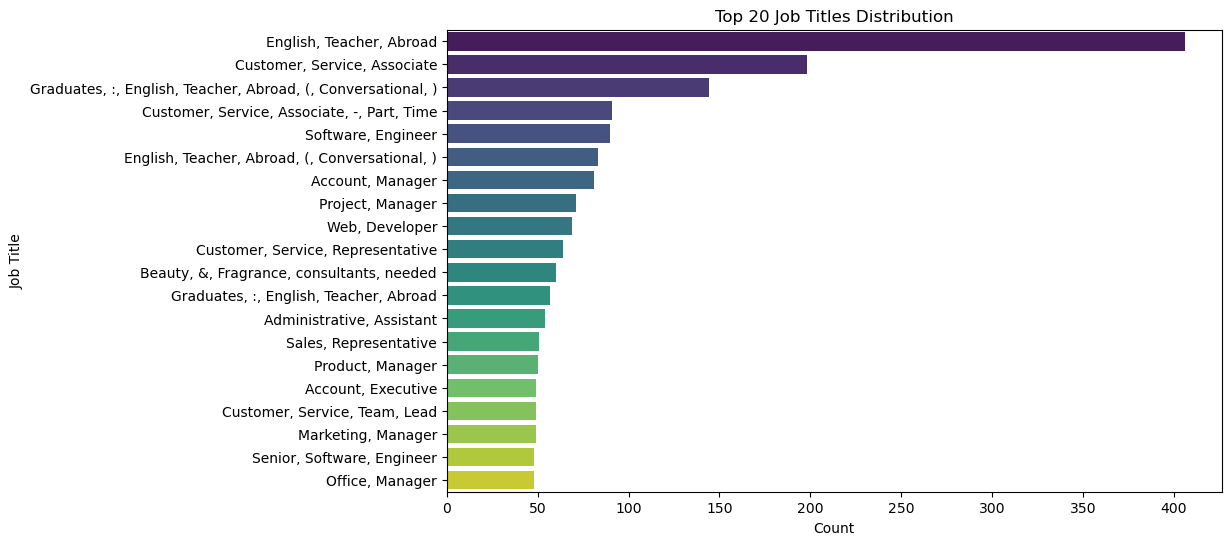

In [31]:
# Top 20 most common job titles
top_titles = jobs['title'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")
plt.title('Top 20 Job Titles Distribution')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


##### 2) Employment Type Distribution

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3771778381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_type', data=jobs, palette="Set2")


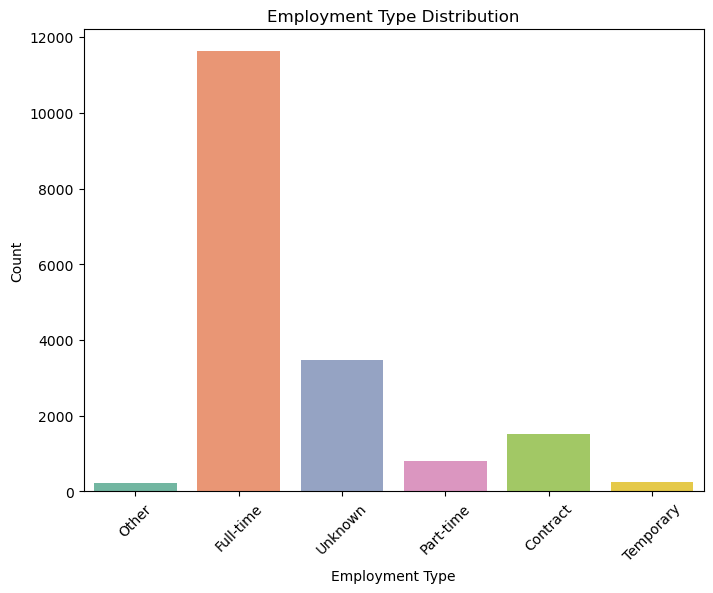

In [33]:
# Count plot showing the distribution of various employment types (Full-time, Internship, etc.).
plt.figure(figsize=(8,6))
sns.countplot(x='employment_type', data=jobs, palette="Set2")
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Full-time jobs are mostly in demand

##### 3)  Word Cloud

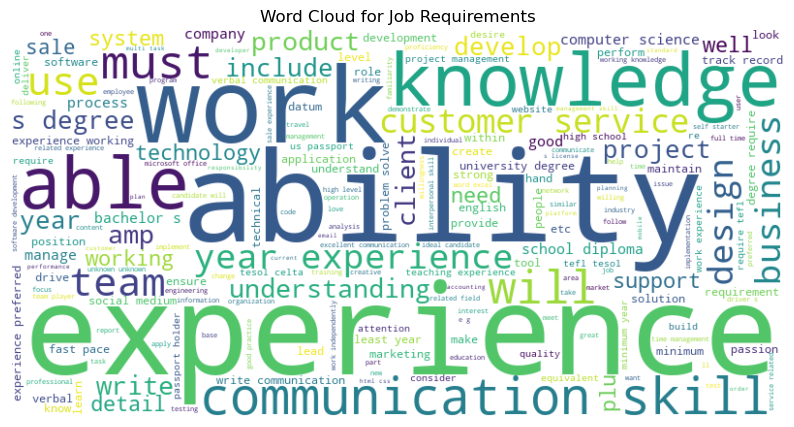

In [36]:
# Create a Word Cloud for job requirements
all_requirements = ' '.join(jobs['requirements'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_requirements)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Requirements')
plt.show()


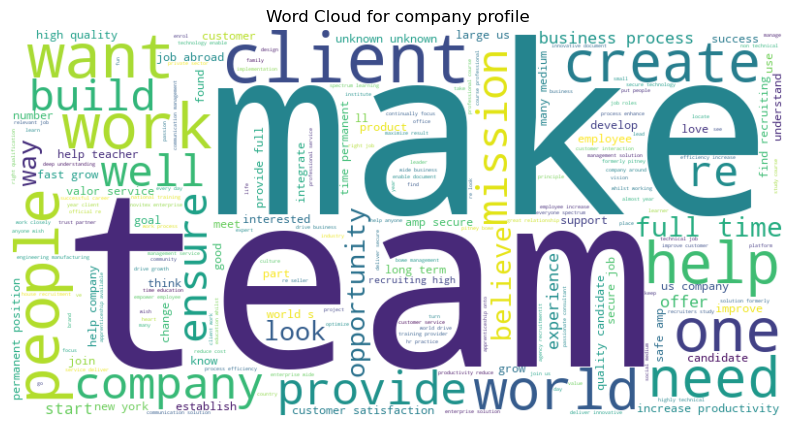

In [37]:
# Create a Word Cloud for company profile
profile = ' '.join(jobs['company_profile'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(profile)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for company profile')
plt.show()


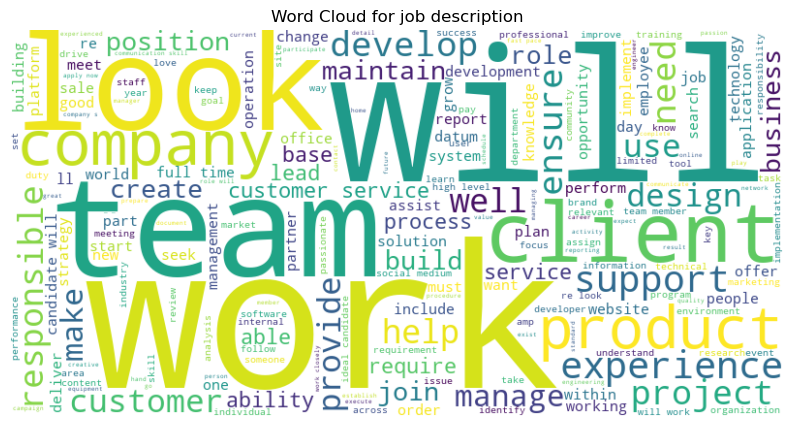

In [38]:
# Create a Word Cloud for job description
all_desc = ' '.join(jobs['description'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_desc)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for job description')
plt.show()


 ##### 4) Telecommuting vs. Company Logo

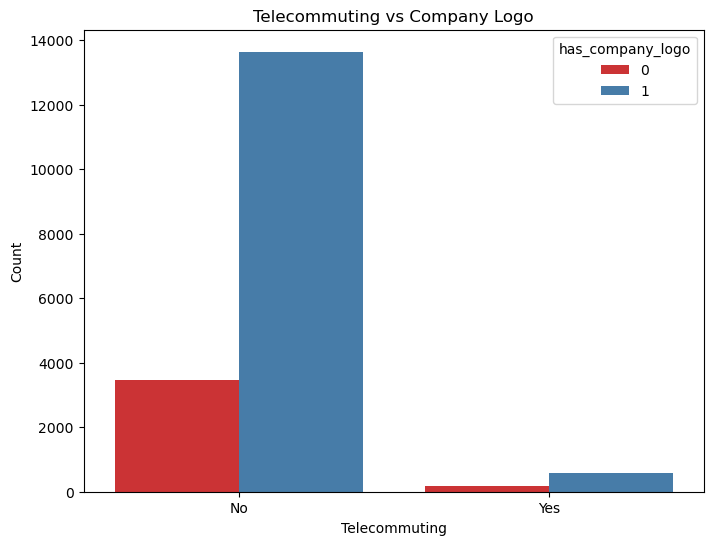

In [40]:
# A comparison of jobs offering telecommuting vs. those with a company logo.
plt.figure(figsize=(8,6))
sns.countplot(x='telecommuting', hue='has_company_logo', data=jobs, palette='Set1')
plt.title('Telecommuting vs Company Logo')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


 Most of the telecommuting jobs have a company logo

##### 5) Industry and Function Distribution

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\1330474206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='industry', data=jobs, palette='muted', order=jobs['industry'].value_counts().index)


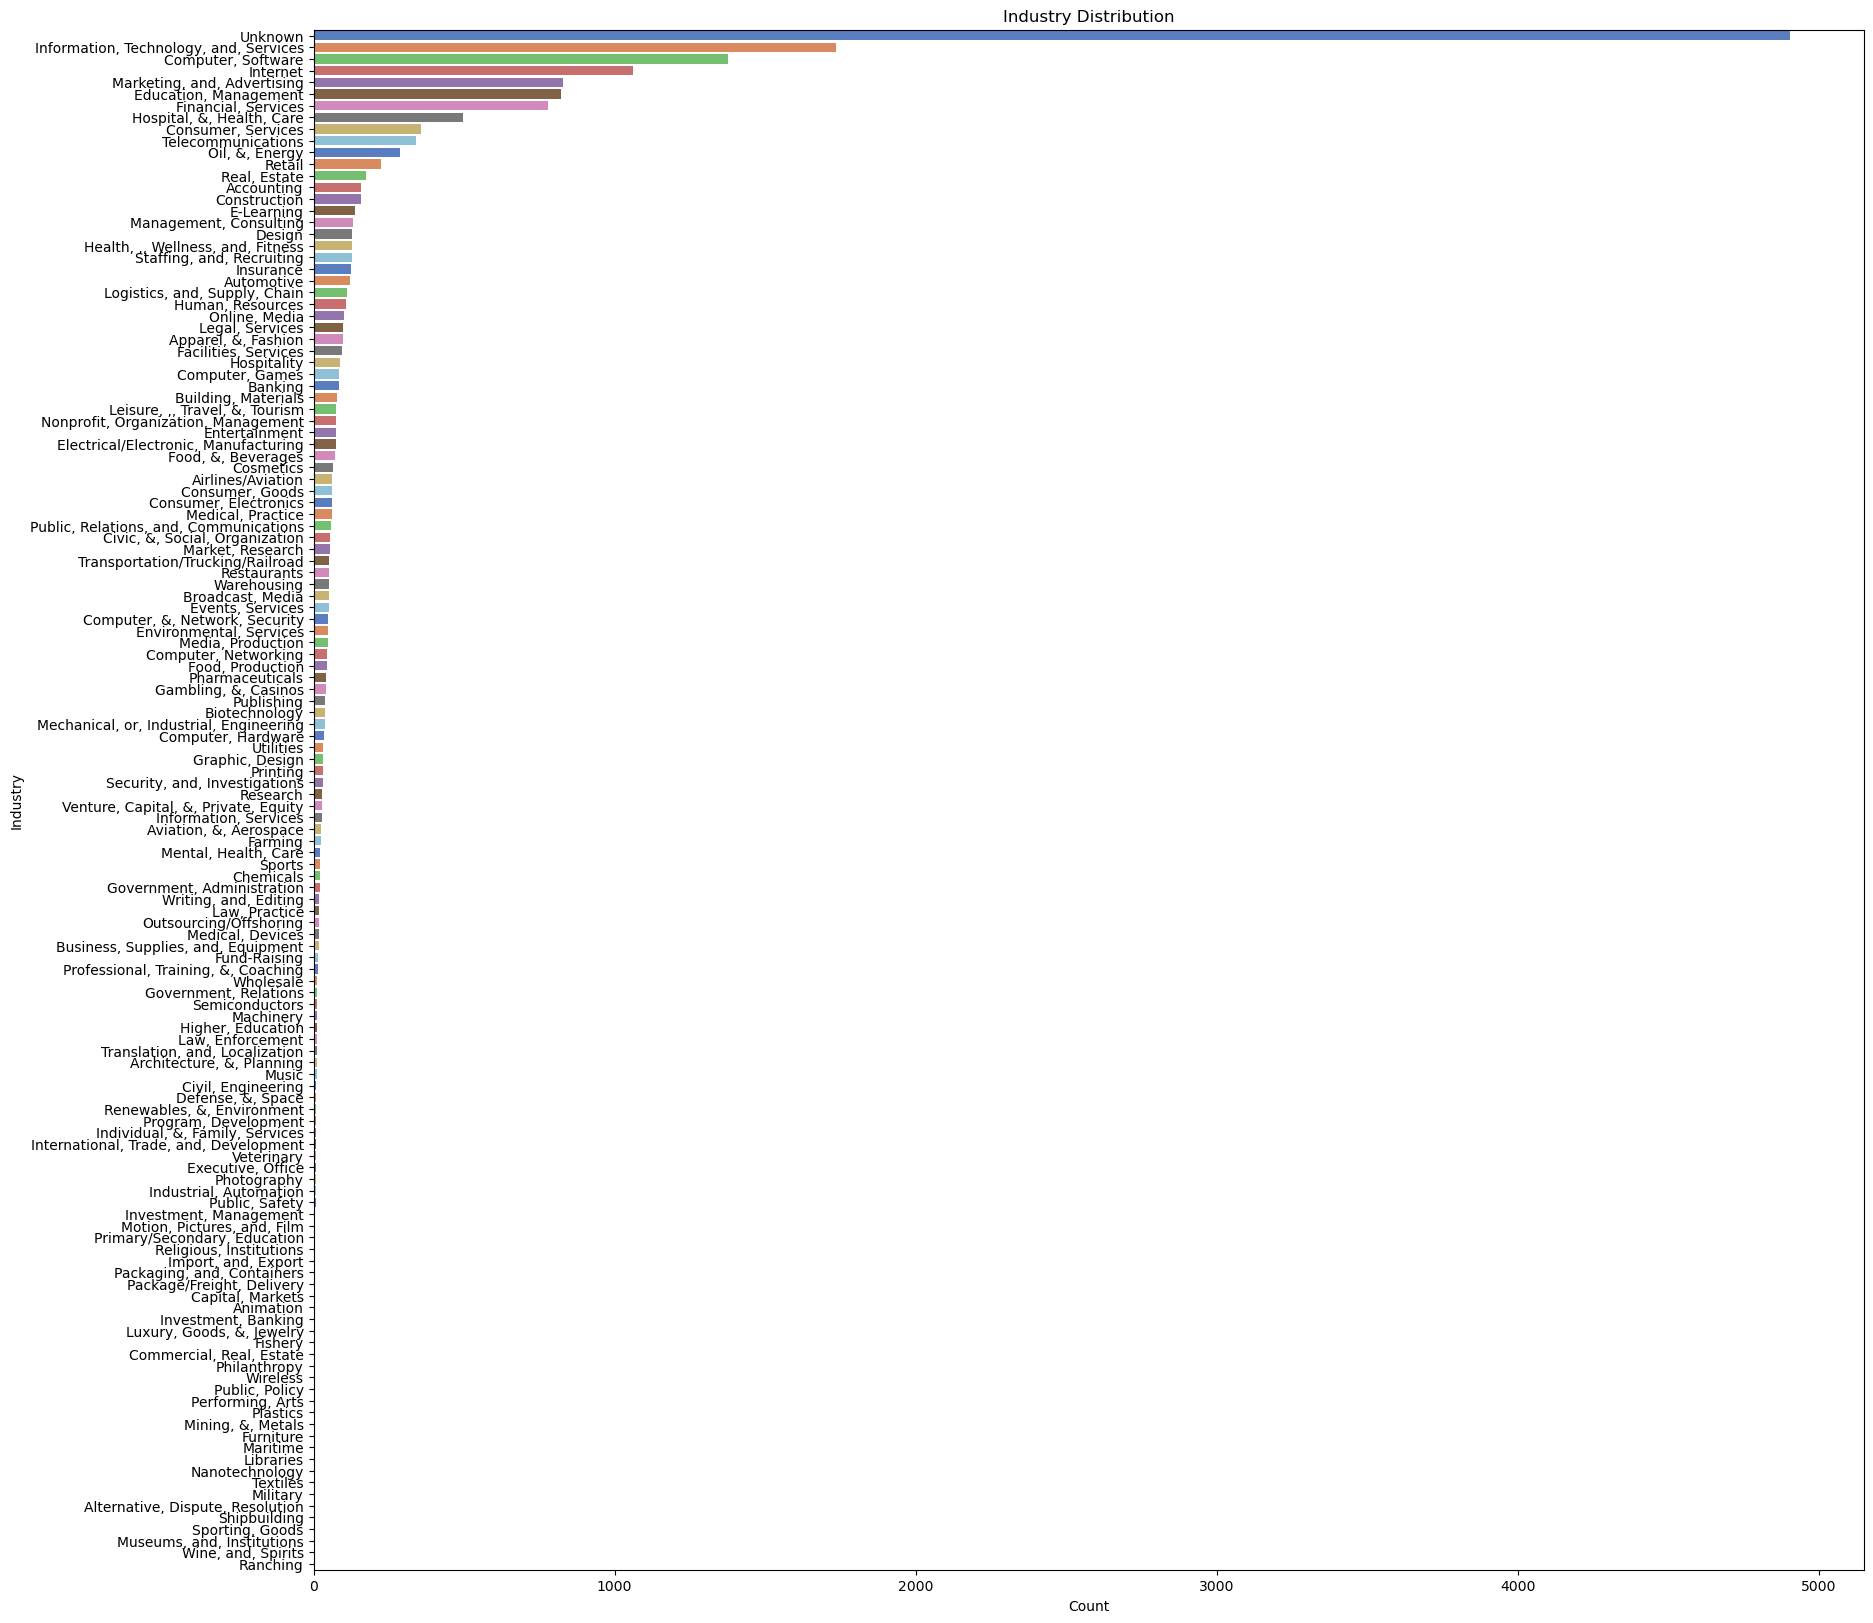

In [43]:
 # Bar plots showing the distribution of job industries 
plt.figure(figsize=(20,20))
sns.countplot(y='industry', data=jobs, palette='muted', order=jobs['industry'].value_counts().index)
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()



In most job postings, the industry is not specified , howevever, the most popular industry is 'IT and Services'

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\2603433612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='function', data=jobs, palette='Set3', order=jobs['function'].value_counts().index)


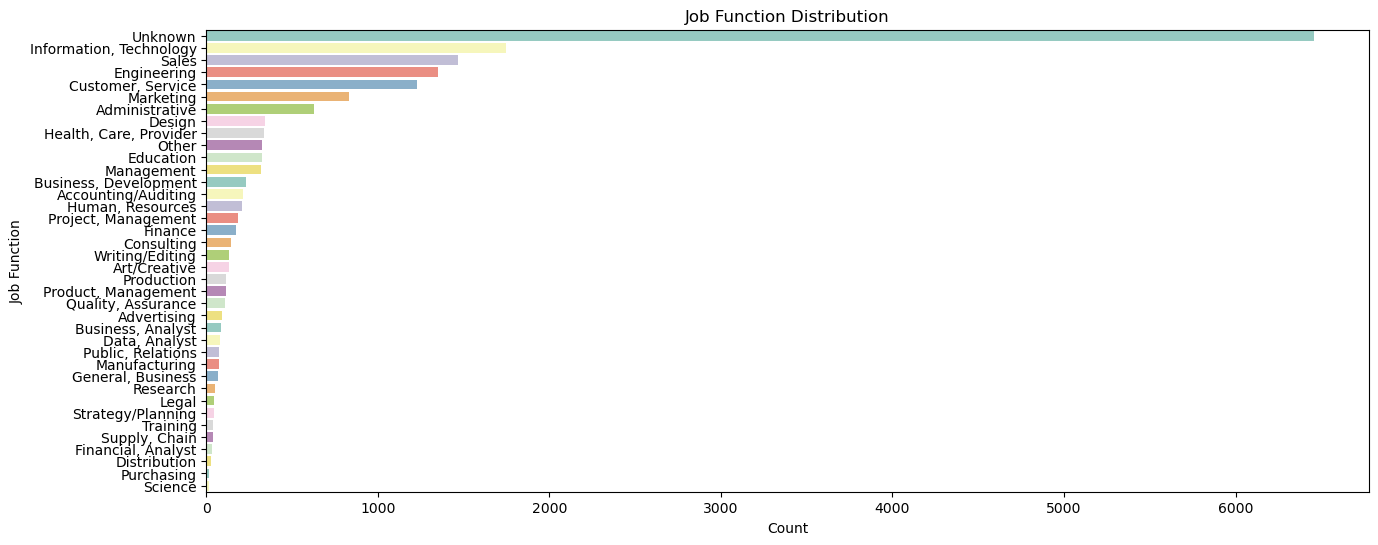

In [45]:
 # Bar plots showing the distribution of job functions.
plt.figure(figsize=(15,6))
sns.countplot(y='function', data=jobs, palette='Set3', order=jobs['function'].value_counts().index)
plt.title('Job Function Distribution')
plt.xlabel('Count')
plt.ylabel('Job Function')
plt.show()


In most job postings, the function is not specified , however, the most required functionslity is 'IT' followed by 'Sales and 'Engineering'



 ##### 6) Experience Level vs. Employment Type

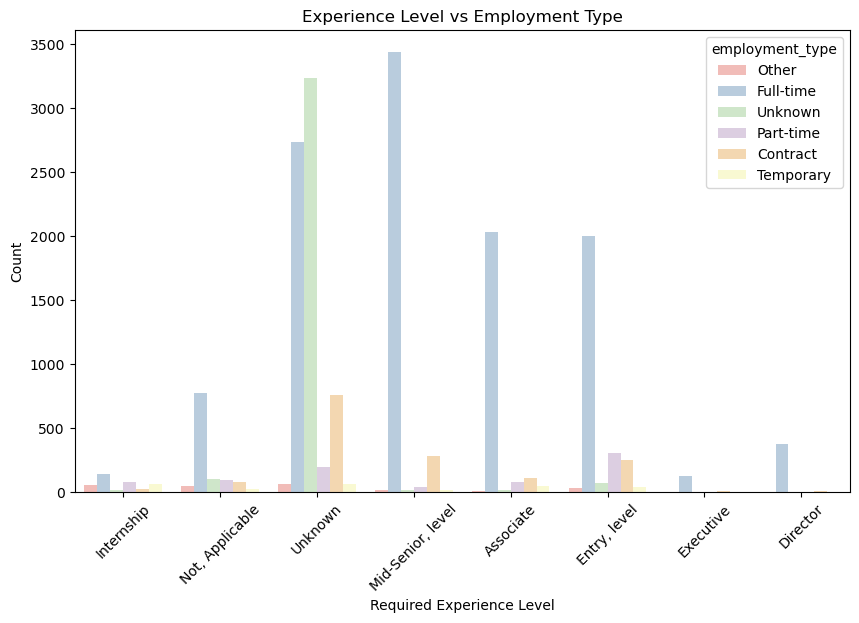

In [48]:
# Comparison of required experience levels for different employment types.
plt.figure(figsize=(10,6))
sns.countplot(x='required_experience', hue='employment_type', data=jobs, palette='Pastel1')
plt.title('Experience Level vs Employment Type')
plt.xlabel('Required Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In most of the job postings, experience - level and employment type is unspecified, 
but the majority of the the postings require a mid-senior level experience and demands full-time employees
followed by associate and entry-level positions for full-time employees.

##### 7) Fraudulent Jobs Distribution

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\1105710589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=jobs, palette='coolwarm')


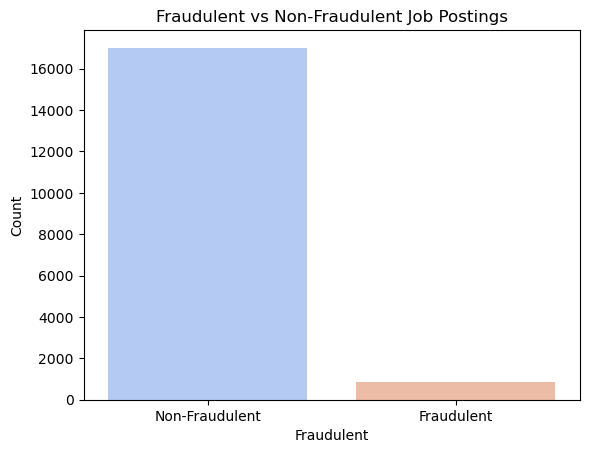

In [51]:
sns.countplot(x='fraudulent', data=jobs, palette='coolwarm')
plt.title('Fraudulent vs Non-Fraudulent Job Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


Most of the jobs are non-fraudlent in this dataset

##### 8) Telecommuting Jobs

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3139404640.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='telecommuting', data=jobs, palette='Set2')


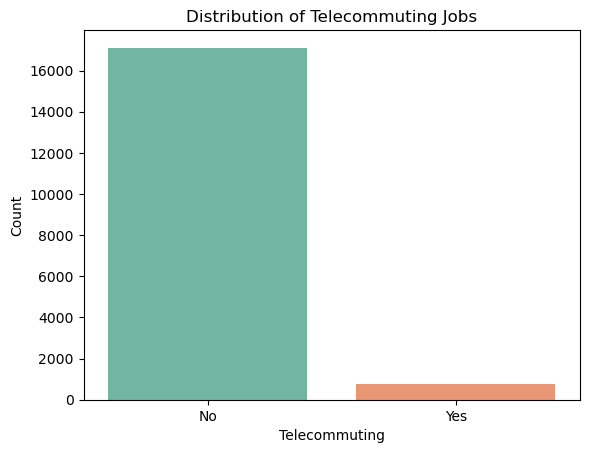

In [54]:
sns.countplot(x='telecommuting', data=jobs, palette='Set2')
plt.title('Distribution of Telecommuting Jobs')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Most of the job postings are not remote as a majority of them doesn't have telecommuting

##### 9) Fraudulent Jobs by Employment Type

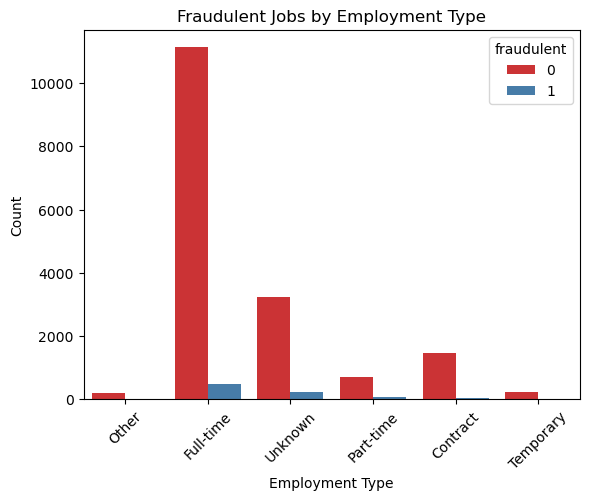

In [57]:
sns.countplot(x='employment_type', hue='fraudulent', data=jobs, palette='Set1')
plt.title('Fraudulent Jobs by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


since the majority of job postings require full-time employees, most of the fraudlent postings are also based on full-time postings.

 ##### 10) Fraudulent Jobs by Industry

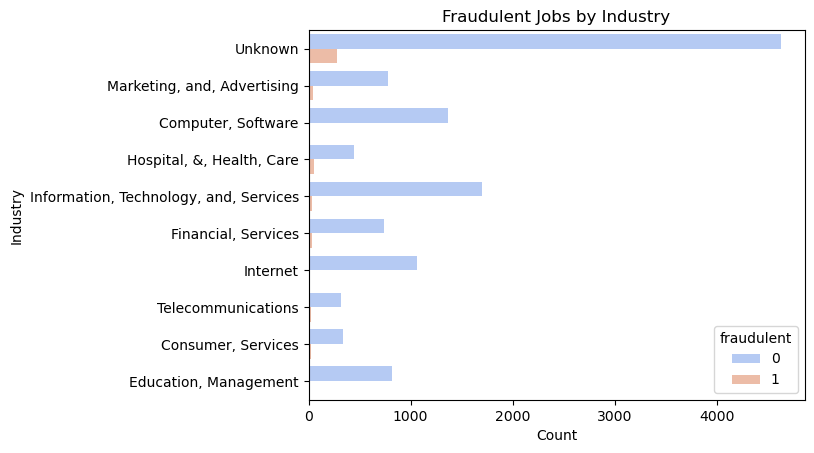

In [60]:
top_industries = jobs['industry'].value_counts().head(10).index
industry_data = jobs[jobs['industry'].isin(top_industries)]

sns.countplot(y='industry', hue='fraudulent', data=industry_data, palette='coolwarm')
plt.title('Fraudulent Jobs by Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()


In most of the fraudlent job postings, the industry is not specified

##### 11) Telecommuting and Fraudulent Jobs

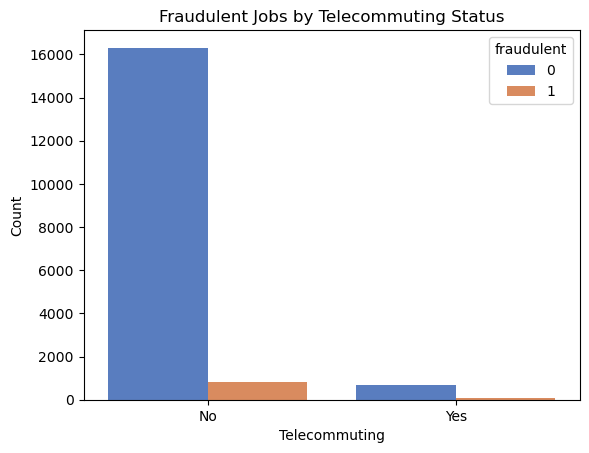

In [63]:
sns.countplot(x='telecommuting', hue='fraudulent', data=jobs, palette='muted')
plt.title('Fraudulent Jobs by Telecommuting Status')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Most of the fraudlent job-postings doesn't support telecommuting

# TASK:1

## Classifying the fraudlent job postings

## Preparing the dataset 

#### 1) Encoding

In [69]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Apply label encoding to each column
for col in categorical_cols:
    jobs[col] = label_encoder.fit_transform(jobs[col])

# Check the transformed dataset
print(jobs[categorical_cols].head())


   employment_type  required_experience  required_education  industry  \
0                2                    4                   9       123   
1                1                    6                   9        75   
2                5                    7                   9       123   
3                1                    5                   1        22   
4                1                    5                   1        51   

   function  
0        22  
1         7  
2        36  
3        31  
4        16  


In [70]:
jobs.columns

Index(['title', 'company_profile', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

#### 2) Vectorizing textual data

In [72]:
# Define TF-IDF vectorizer with a maximum of 40 features per column 
tfidf = TfidfVectorizer(max_features=40)

# Store vectorized data and feature names
vectorized_data = []
feature_names = []

# Apply TF-IDF for each textual column
for col in textual_columns:
    tfidf_matrix = tfidf.fit_transform(jobs[col].fillna(""))
    vectorized_data.append(tfidf_matrix.toarray())
    
    # Prefix feature names with the column name to avoid overlap
    col_features = [f"{col}_{feat}" for feat in tfidf.get_feature_names_out()]
    feature_names.extend(col_features)

# Combine all vectorized data horizontally
tfidf_features = pd.DataFrame(
    data=np.hstack(vectorized_data),
    columns=feature_names
)

# Display the shape of the resulting TF-IDF feature set
print(f"TF-IDF feature set shape: {tfidf_features.shape}")

TF-IDF feature set shape: (17880, 120)


#### 3) Combining with Other Features:

In [74]:
jobs_final = pd.concat([jobs.drop(columns=textual_columns), tfidf_features], axis=1)
print(jobs_final.shape)


(17880, 130)


#### 4) Scaling

In [76]:
#  Scaling Numeric Data
numeric_columns = ['telecommuting','has_company_logo', 'has_questions']
scaler = MinMaxScaler()
jobs_final[numeric_columns] = scaler.fit_transform(jobs_final[numeric_columns])



In [77]:
jobs_final

title  telecommuting  \
0                                      Marketing, Intern            0.0   
1         Customer, Service, -, Cloud, Video, Production            0.0   
2         Commissioning, Machinery, Assistant, (, CMA, )            0.0   
3                  Account, Executive, -, Washington, DC            0.0   
4                                  Bill, Review, Manager            0.0   
...                                                  ...            ...   
17875                 Account, Director, -, Distribution            0.0   
17876                                Payroll, Accountant            0.0   
17877  Project, Cost, Control, Staff, Engineer, -, Co...            0.0   
17878                                  Graphic, Designer            0.0   
17879                       Web, Application, Developers            0.0   

       has_company_logo  has_questions  employment_type  required_experience  \
0                   1.0            0.0                2                    4   
1                   1.0            0.0                1                    6   
2                   1.0            0.0                5                    7   
3                   1.0            0.0                1                    5   
4                   1.0            1.0                1                    5   
...                 ...            ...              ...                  ...   
17875               1.0            1.0                1                    5   
17876               1.0            1.0                1                    5   
17877               0.0            0.0                1                    7   
17878               0.0            1.0                0                    6   
17879               1.0            1.0                1                    5   

       required_education  industry  function  fraudulent  ...  \
0                       9       123        22           0  ...   
1                       9        75         7           0  ...   
2                       9       123        36           0  ...   
3                       1        22        31           0  ...   
4                       1        51        16           0  ...   
...                   ...       ...       ...         ...  ...   
17875                   9        22        31           0  ...   
17876                   1        61         0           0  ...   
17877                   9       123        36           0  ...   
17878                   6        48         9           0  ...   
17879                   9        22        12           0  ...   

       requirements_to  requirements_we  requirements_will  requirements_with  \
0             0.128207         0.000000           0.000000           0.352788   
1             0.218171         0.273733           0.085763           0.096055   
2             0.456049         0.000000           0.000000           0.278869   
3             0.484680         0.000000           0.000000           0.193992   
4             0.361659         0.000000           0.000000           0.099518   
...                ...              ...                ...                ...   
17875         0.090931         0.095073           0.178723           0.150129   
17876         0.325865         0.000000           0.000000           0.430408   
17877         0.396947         0.237161           0.111456           0.124832   
17878         0.323417         0.000000           0.000000           0.000000   
17879         0.317705         0.474542           0.000000           0.199824   

       requirements_work  requirements_working  requirements_write  \
0               0.000000              0.235855            0.000000   
1               0.120504              0.080271            0.000000   
2               0.139941              0.000000            0.000000   
3               0.060843              0.000000            0.154792   
4               0.249698              0.000000            0.000000   
...

## Modeling

In [79]:
jobs_final.dtypes

title                    object
telecommuting           float64
has_company_logo        float64
has_questions           float64
employment_type           int32
                         ...   
requirements_working    float64
requirements_write      float64
requirements_year       float64
requirements_you        float64
requirements_your       float64
Length: 130, dtype: object

In [80]:
jobs_final = jobs_final.drop(columns=['title'])

#### Step 1 : Train-Test Split

In [82]:
from sklearn.model_selection import train_test_split

# Assuming 'fraudulent' is the target variable
X = jobs_final.drop(columns=['fraudulent'])
y = jobs_final['fraudulent']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Check class distribution before SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train)}")


Class distribution before SMOTE: Counter({0: 13619, 1: 685})
Class distribution after SMOTE: Counter({0: 13619, 1: 13619})


#### Step 2: Hyperparameter Tuning for Multiple Models

In [85]:
# Check for columns with object type (likely to contain text)
text_columns = jobs_final.select_dtypes(include=['object']).columns
print(text_columns)


Index([], dtype='object')


In [86]:
# rf = RandomForestClassifier(random_state=42)

# # Hyperparameters for Random Forest
# rf_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# # Hyperparameter tuning using GridSearchCV
# rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, cv=3, n_jobs=-1, verbose=2)
# rf_grid_search.fit(X_train, y_train)

# # Best parameters for Random Forest
# print("Best parameters for Random Forest: ", rf_grid_search.best_params_)


In [87]:
# dt = DecisionTreeClassifier(random_state=42)

# # Hyperparameters for Decision Tree
# dt_params = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy'],
# }

# # Hyperparameter tuning using GridSearchCV
# dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params, cv=3, n_jobs=-1, verbose=2)
# dt_grid_search.fit(X_train, y_train)

# # Best parameters for Decision Tree
# print("Best parameters for Decision Tree: ", dt_grid_search.best_params_)


In [88]:
# knn = KNeighborsClassifier()

# # Hyperparameters for KNN
# knn_params = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }

# # Hyperparameter tuning using GridSearchCV
# knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, cv=3, n_jobs=-1, verbose=2)
# knn_grid_search.fit(X_train, y_train)

# # Best parameters for KNN
# print("Best parameters for KNN: ", knn_grid_search.best_params_)


In [89]:
# ada = AdaBoostClassifier(random_state=42)

# # Hyperparameters for AdaBoost
# ada_params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1, 10],
# }

# # Hyperparameter tuning using GridSearchCV
# ada_grid_search = GridSearchCV(estimator=ada, param_grid=ada_params, cv=3, n_jobs=-1, verbose=2)
# ada_grid_search.fit(X_train, y_train)

# # Best parameters for AdaBoost
# print("Best parameters for AdaBoost: ", ada_grid_search.best_params_)


In [90]:
# gb = GradientBoostingClassifier(random_state=42)

# # Hyperparameters for Gradient Boosting
# gb_params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5],
# }

# # Hyperparameter tuning using GridSearchCV
# gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_params, cv=3, n_jobs=-1, verbose=2)
# gb_grid_search.fit(X_train, y_train)

# # Best parameters for Gradient Boosting
# print("Best parameters for Gradient Boosting: ", gb_grid_search.best_params_)


In [91]:
# import xgboost as xgb

# xgb_model = xgb.XGBClassifier(random_state=42)

# # Hyperparameters for XGBoost
# xgb_params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 5, 10],
# }

# # Hyperparameter tuning using GridSearchCV
# xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=3, n_jobs=-1, verbose=2)
# xgb_grid_search.fit(X_train, y_train)

# # Best parameters for XGBoost
# print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)


#### Training the models after finding the best parameters by hyperparameter tuning

In [93]:
# Best parameters from hyperparameter tuning
best_params = {
    "random_forest": {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200},
    "decision_tree": {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2},
    "knn":{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'},
    "adaboost": {"learning_rate": 1, "n_estimators": 200},
    "gradient_boost": {"learning_rate": 0.5, "max_depth": 7, "min_samples_split": 5, "n_estimators": 200},
    "xgboost": {"learning_rate": 0.2, "max_depth": 7, "min_child_weight": 1, "n_estimators": 200},
}

# Initialize models with best parameters
models = {
    "Random Forest": RandomForestClassifier(**best_params["random_forest"], random_state=42),
    "Decision Tree": DecisionTreeClassifier(**best_params["decision_tree"], random_state=42),
    "KNN": KNeighborsClassifier(**best_params["knn"]),
    "AdaBoost": AdaBoostClassifier(**best_params["adaboost"], random_state=42),
    "Gradient Boost": GradientBoostingClassifier(**best_params["gradient_boost"], random_state=42),
    "XGBoost": xgb.XGBClassifier(**best_params["xgboost"], use_label_encoder=False, eval_metric="logloss", random_state=42),
}


    

In [94]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    kappa = cohen_kappa_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Calculate confusion matrix
    sensitivity = tp / (tp + fn)   # Calculate Sensitivity (Recall)
    specificity = tn / (tn + fp)   # Calculate Specificity
    logloss = log_loss(y_test, y_pred_proba)   # Calculate Log Loss
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "cohen-kappa":kappa,
        "sensitivity":sensitivity,
        "specificity":specificity,
        "ROC-AUC": roc_auc,
        
    }

C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Amritha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:22:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [95]:
results_df = pd.DataFrame(results)
results_df

Random Forest  Decision Tree       KNN  AdaBoost  Gradient Boost  \
Accuracy          0.978188       0.954978  0.940157  0.951622        0.980145   
Precision         0.977261       0.963065  0.963412  0.963656        0.979994   
Recall            0.978188       0.954978  0.940157  0.951622        0.980145   
F1-Score          0.977582       0.958187  0.948392  0.956153        0.980067   
cohen-kappa       0.760517       0.599599  0.556097  0.593386        0.791777   
sensitivity       0.729282       0.734807  0.834254  0.773481        0.795580   
specificity       0.991458       0.966716  0.945803  0.961119        0.989985   
ROC-AUC           0.988902       0.851302  0.897413  0.964669        0.977997   

              XGBoost  
Accuracy     0.981544  
Precision    0.980980  
Recall       0.981544  
F1-Score     0.981191  
cohen-kappa  0.800661  
sensitivity  0.779006  
specificity  0.992342  
ROC-AUC      0.987167

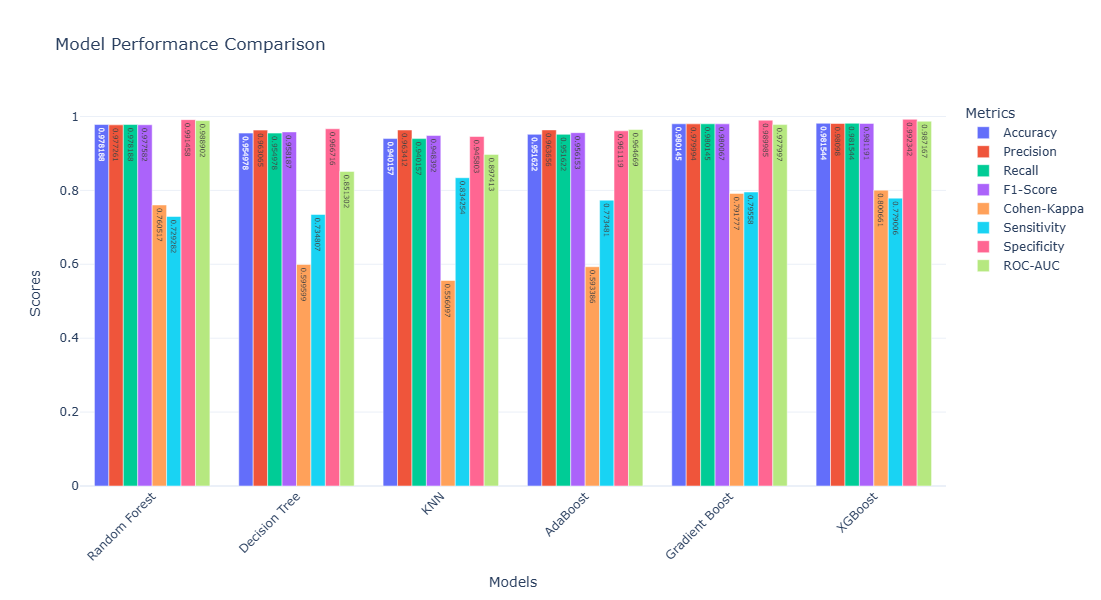

In [201]:
import plotly.graph_objects as go
import numpy as np

# Data for the models and metrics
models = ['Random Forest', 'Decision Tree', 'KNN', 'AdaBoost', 'Gradient Boost', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cohen-Kappa', 'Sensitivity', 'Specificity', 'ROC-AUC']

# Values for each metric for each model
values = np.array([
    [0.978188, 0.977261, 0.978188, 0.977582, 0.760517, 0.729282, 0.991458, 0.988902],  # Random Forest
    [0.954978, 0.963065, 0.954978, 0.958187, 0.599599, 0.734807, 0.966716, 0.851302],  # Decision Tree
    [0.940157, 0.963412, 0.940157, 0.948392, 0.556097, 0.834254, 0.945803, 0.897413],  # KNN
    [0.951622, 0.963656, 0.951622, 0.956153, 0.593386, 0.773481, 0.961119, 0.964669],  # AdaBoost
    [0.980145, 0.979994, 0.980145, 0.980067, 0.791777, 0.795580, 0.989985, 0.977997],  # Gradient Boost
    [0.981544, 0.980980, 0.981544, 0.981191, 0.800661, 0.779006, 0.992342, 0.987167]   # XGBoost
])

# Initialize a figure
fig = go.Figure()

# Add bars for each metric
bar_width = 0.1
for i, metric in enumerate(metrics):
    fig.add_trace(go.Bar(
        x=models,
        y=values[:, i],
        name=metric,
        text=values[:, i],
        textposition='auto',
        offsetgroup=i
    ))

# Update layout for better readability
fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Models',
    yaxis_title='Scores',
    barmode='group',
    legend_title='Metrics',
    xaxis_tickangle=-45,
    template='plotly_white',
    width=1200,
    height=600
)

# Show the plot
fig.show()


C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3593072072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


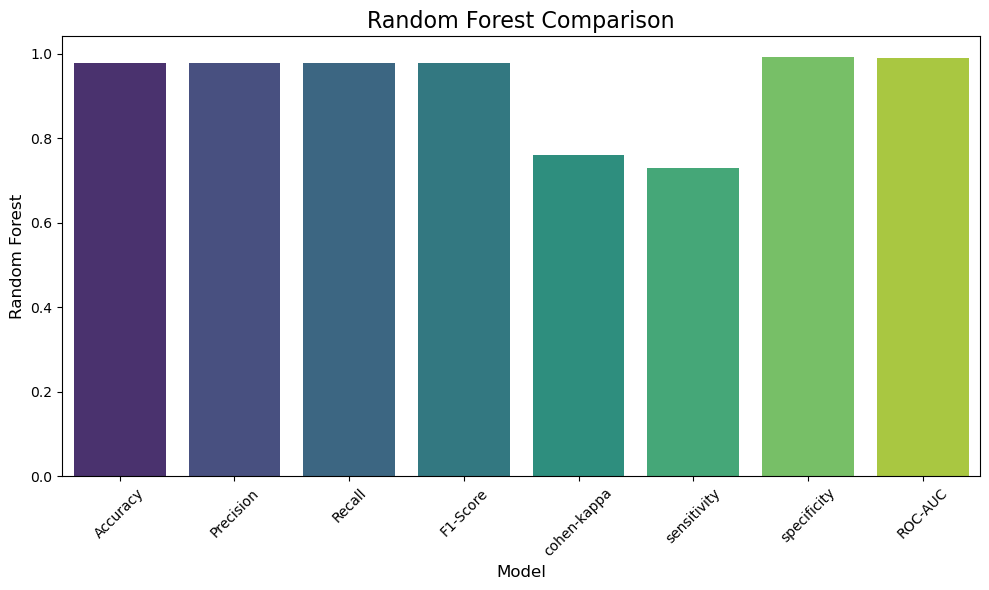

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3593072072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


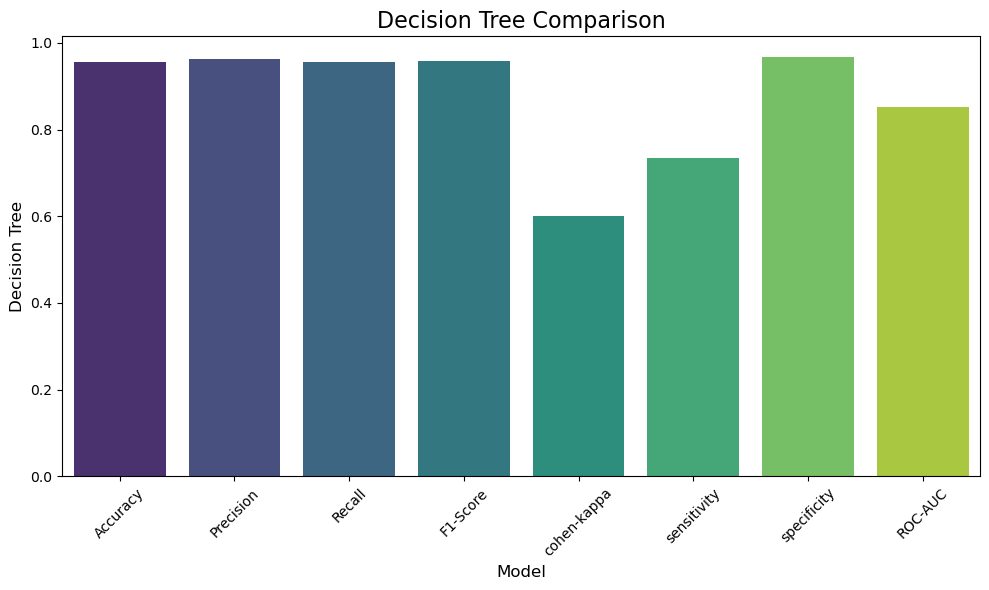

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3593072072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


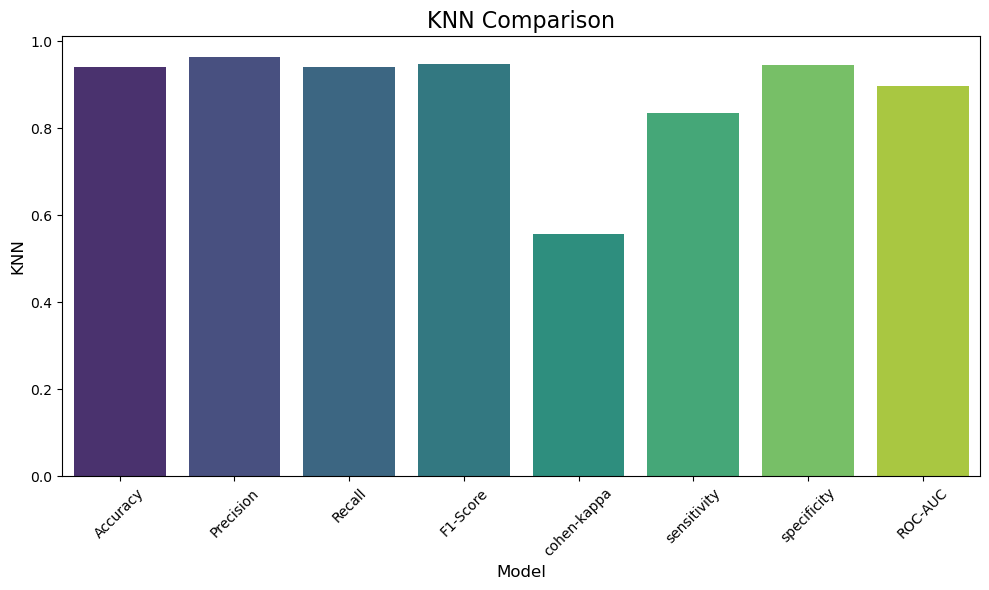

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3593072072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


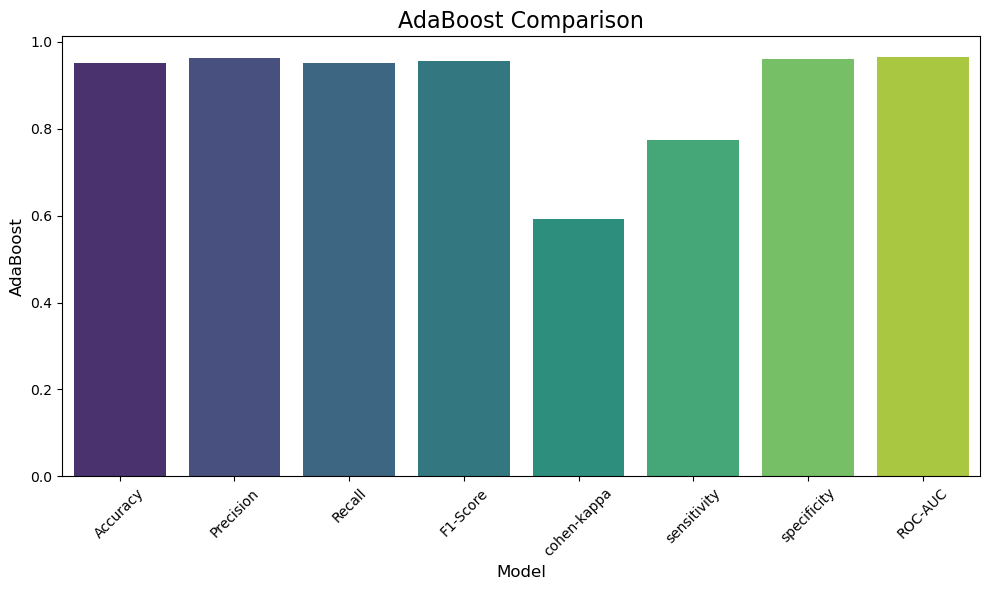

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3593072072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


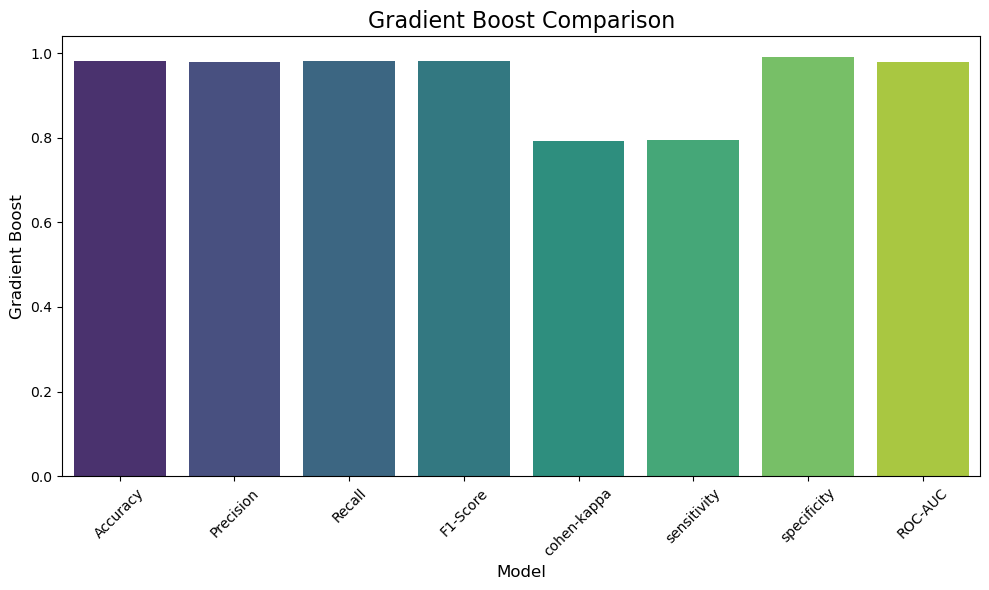

C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\3593072072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


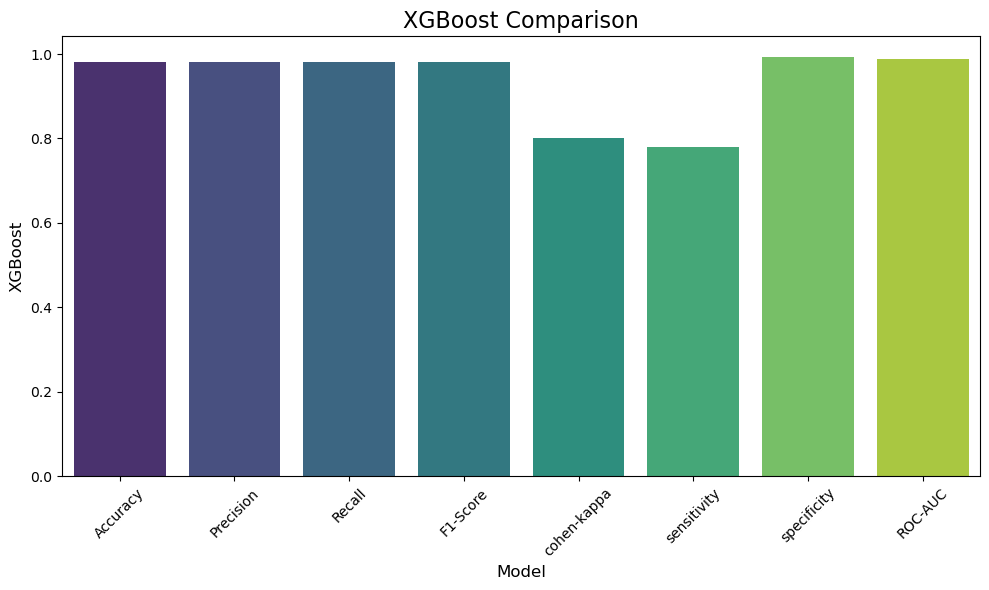

In [97]:
# Plot for each metric if columns are structured properly
for metric in results_df.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")
    plt.title(f'{metric} Comparison', fontsize=16)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel('Model', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### XGBoost shows best perfomance

In [99]:
from xgboost import XGBClassifier  
from sklearn.metrics import confusion_matrix

# Step 1: Instantiate and train the model
xgb_model = XGBClassifier(random_state=42, learning_rate= 0.2, max_depth= 7, min_child_weight= 1, n_estimators=200)  
xgb_model.fit(X_train, y_train)  # Ensure X_train and y_train are properly defined

# Step 2: Make predictions on the test set
y_pred_rf = xgb_model.predict(X_test)  # Use the trained model's predict method

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)  # y_test is the true test labels

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[3369   26]
 [  40  141]]


In [100]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3395
           1       0.84      0.78      0.81       181

    accuracy                           0.98      3576
   macro avg       0.92      0.89      0.90      3576
weighted avg       0.98      0.98      0.98      3576



# TASK :2

#### Identify skill trends across industries, revealing patterns in demand.  

In [103]:
df = pd.read_csv("processed_jobs.csv")  

# Combine relevant text columns into a single column
df['combined_text'] = (
    df['title'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('')
)

# Drop rows with empty combined text
df = df[df['combined_text'].str.strip() != '']

In [104]:
# Convert the text data into a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['combined_text'])

print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (17880, 5000)


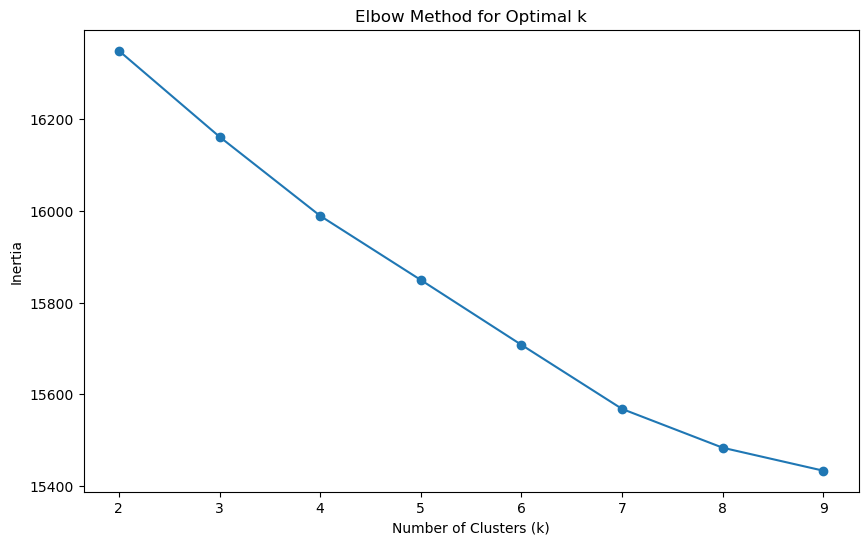

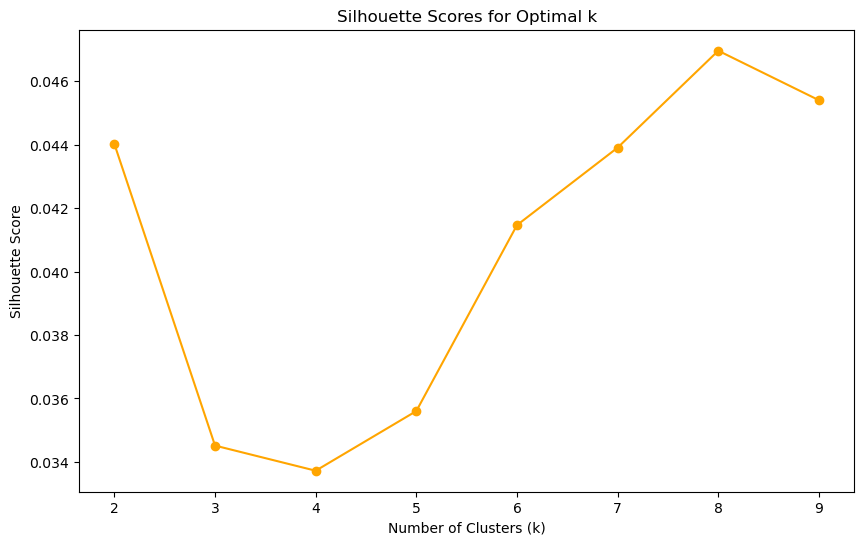

In [105]:
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters 
k_values = range(2, 10)
inertia = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, sil_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


In the elbow plot, k=8 and the silhouette score  at k = 8 is maximum . So, we will take 8 clusters.

In [107]:
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)


print(df[['title', 'cluster']].head())


                                            title  cluster
0                               Marketing, Intern        0
1  Customer, Service, -, Cloud, Video, Production        0
2  Commissioning, Machinery, Assistant, (, CMA, )        0
3           Account, Executive, -, Washington, DC        4
4                           Bill, Review, Manager        0


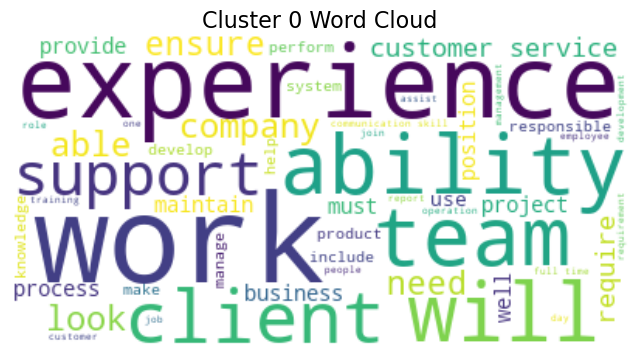

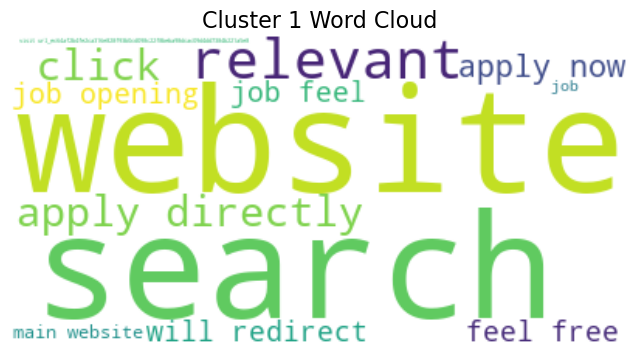

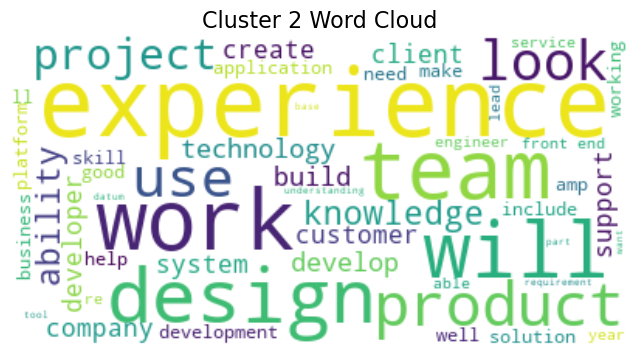

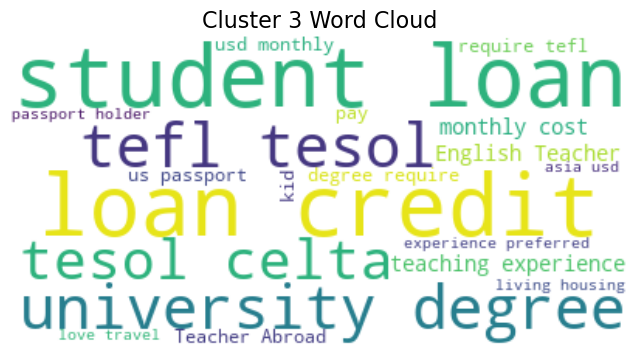

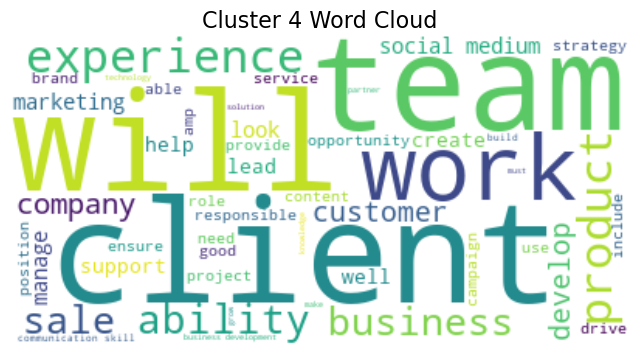

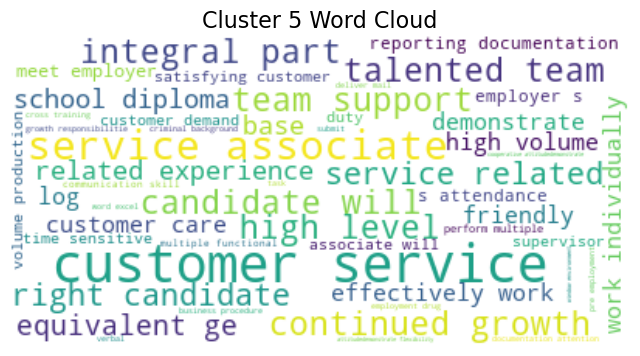

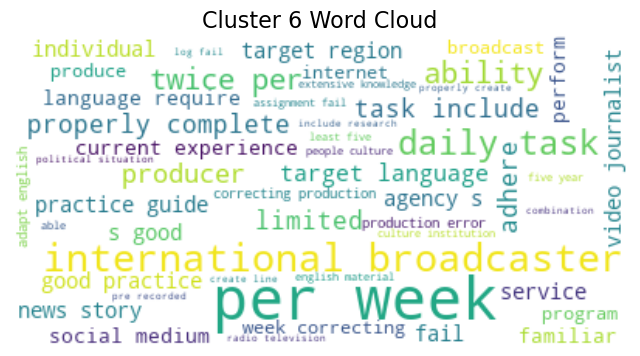

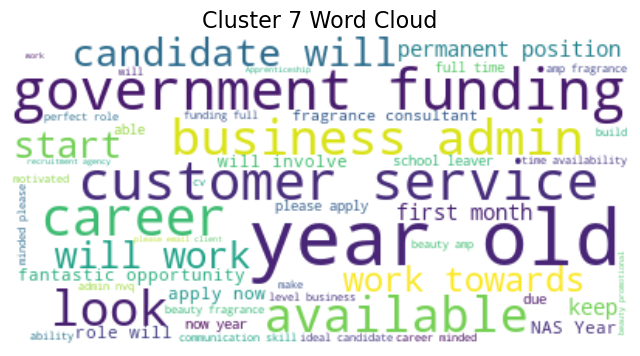

In [108]:
# Generate word clouds for each cluster
for cluster in range(optimal_k):
    cluster_text = ' '.join(df[df['cluster'] == cluster]['combined_text'])
    wordcloud = WordCloud(background_color='white', max_words=50, colormap='viridis').generate(cluster_text)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} Word Cloud', fontsize=16)
    plt.show()


In [109]:
# Extract important terms for each cluster
terms = vectorizer.get_feature_names_out()
for cluster in range(optimal_k):
    print(f"Cluster {cluster} Top Terms:")
    cluster_center = kmeans.cluster_centers_[cluster]
    top_terms = [terms[i] for i in cluster_center.argsort()[-10:]]  # Top 10 terms
    print(", ".join(top_terms))
    print()


Cluster 0 Top Terms:
management, position, support, skill, company, team, experience, service, customer, work

Cluster 1 Top Terms:
free, feel, opening, main, click, redirect, apply, search, job, website

Cluster 2 Top Terms:
application, work, product, software, team, development, developer, experience, web, design

Cluster 3 Top Terms:
living, loan, usd, teacher, teaching, passport, kid, tefl, tesol, celta

Cluster 4 Top Terms:
social, team, account, medium, product, client, business, customer, marketing, sale

Cluster 5 Top Terms:
adhere, cooperative, continued, high, associate, perform, file, service, customer, mail

Cluster 6 Top Terms:
producer, international, twice, properly, news, week, broadcaster, video, fail, shall

Cluster 7 Top Terms:
permanent, admin, old, career, government, apprenticeship, funding, olds, fragrance, beauty



In [110]:

# Validate Clusters
# 1. Check cluster distribution
cluster_distribution = df['cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)



Cluster Distribution:
cluster
0    7960
2    4485
4    3226
3     726
1     486
5     414
7     414
6     169
Name: count, dtype: int64


In [111]:
# 2. Investigate overlap or outliers in Cluster 1 (Potential fraudulent postings)
fraudulent_jobs = df[df['fraudulent'] == 1]
fraudulent_clusters = fraudulent_jobs['cluster'].value_counts()
print("\nFraudulent Jobs in Clusters:")
print(fraudulent_clusters)




Fraudulent Jobs in Clusters:
cluster
0    730
2     78
4     58
Name: count, dtype: int64


C:\Users\Amritha\AppData\Local\Temp\ipykernel_19192\2404739160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette="viridis")


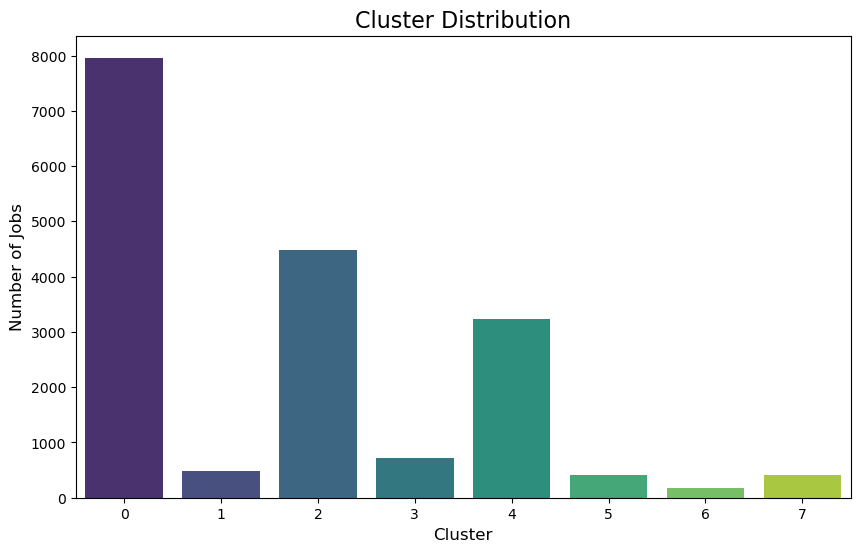

In [112]:
# Visualization
# 1. Bar Plot of Cluster Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette="viridis")
plt.title("Cluster Distribution", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.show()



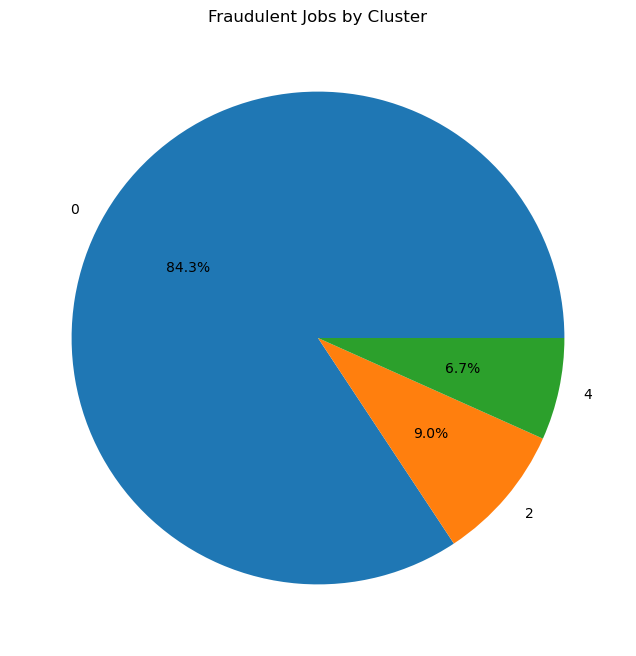

In [113]:
#  Pie Chart for Fraudulent Job Distribution Across Clusters
fraudulent_clusters.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Fraudulent Jobs by Cluster')
plt.ylabel('')
plt.show()



In [114]:
# Actionable Insights
# 1. Identify High-Demand Industries or Skills by Clusters
cluster_industry_skills = df.groupby('cluster')['industry'].apply(lambda x: Counter(x).most_common(3))
print("\nTop Industries by Cluster:")
print(cluster_industry_skills)




Top Industries by Cluster:
cluster
0    [(Unknown, 2523), (Information, Technology, an...
1    [(Unknown, 254), (Computer, Software, 45), (Ma...
2    [(Unknown, 1083), (Computer, Software, 882), (...
3                       [(Education, Management, 726)]
4    [(Unknown, 655), (Marketing, and, Advertising,...
5    [(Financial, Services, 104), (Consumer, Servic...
6    [(Unknown, 128), (Broadcast, Media, 40), (Hosp...
7    [(Unknown, 260), (Cosmetics, 52), (Human, Reso...
Name: industry, dtype: object



Technical vs Soft Skills by Cluster:
   Technical Skills  Soft Skills
0              3867         7236
4              1740         4183
5                65          187
2              9697         2620
7                59          154
1               437          386
3                 0            0
6                30            6


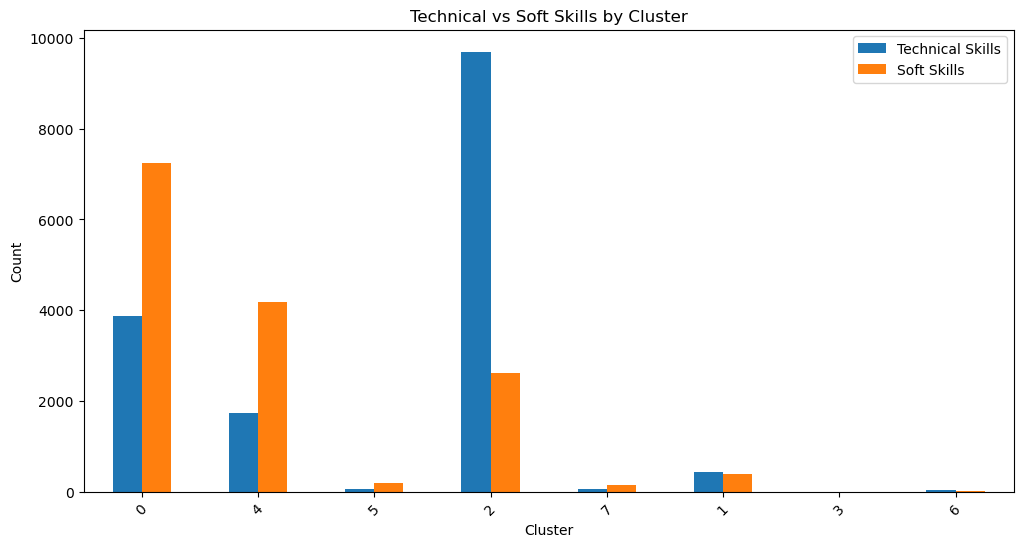

In [115]:
technical_skills = ["software", "developer", "programming", "data", "technical"]
soft_skills = ["communication", "teamwork", "leadership", "management", "creativity"]

cluster_skill_analysis = {}

for cluster in df['cluster'].unique():
    # Ensure 'description' column is free from NaN and convert all to strings
    cluster_text = ' '.join(df[df['cluster'] == cluster]['description'].fillna('').astype(str))
    
    # Count occurrences of technical and soft skills
    tech_count = sum(cluster_text.lower().count(skill) for skill in technical_skills)
    soft_count = sum(cluster_text.lower().count(skill) for skill in soft_skills)
    
    # Store counts in dictionary
    cluster_skill_analysis[cluster] = {"Technical Skills": tech_count, "Soft Skills": soft_count}

# Convert results to a DataFrame
cluster_skill_df = pd.DataFrame(cluster_skill_analysis).T

# Print and plot results
print("\nTechnical vs Soft Skills by Cluster:")
print(cluster_skill_df)

# Bar plot for visualization
cluster_skill_df.plot(kind='bar', figsize=(12, 6), title="Technical vs Soft Skills by Cluster", ylabel="Count", xlabel="Cluster")
plt.xticks(rotation=45)
plt.show()


In [116]:
print(jobs.iloc[9000])

title                                         Account, Executive, -, NYC
company_profile        nfp , be , a , leader , in , the , delivery , ...
description            summary , : , this , be , a , full - time , po...
requirements           knowledge , , , skill , and/or , ability , kno...
telecommuting                                                          0
has_company_logo                                                       1
has_questions                                                          1
employment_type                                                        1
required_experience                                                    0
required_education                                                     1
industry                                                              59
function                                                              15
fraudulent                                                             0
Name: 9000, dtype: object
